### Lecture 9 and 10: Thyroid Example

### Setup imports

In [70]:
!pip install pandas


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

In [71]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Load data

In [72]:
thyroid_df = pd.read_csv('thyroid_data.csv')

thyroid_df.shape #383 rows and 17 column

(383, 17)

In [73]:
thyroid_df.head() #Prints first 5 rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [74]:
thyroid_df['Recurred'].value_counts() #Tells us the values of a specific column

Recurred
No     275
Yes    108
Name: count, dtype: int64

### One hot encode the categorical columns

In [75]:
#Define a list of columns to not one hot encode
cols_to_exclude = ['Age', 'Recurred']

#Make a list of cols to one hot encode using a list comprehension
categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

### Define the column transformer

In [76]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough' #Tells python to keep the excluded columns
)

### Apply the transformation

In [77]:
transformed_data = column_transformer.fit_transform(thyroid_df)

type(transformed_data) #numpy is similar to pandas, not a dataframe but an array
transformed_data #We now have 40 new columns

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [78]:
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out()

#Convert to list
encoded_cols = list(encoded_cols)
encoded_cols.append('Age')
encoded_cols.append('Recurred') #This gets us back to our 56 columns
encoded_cols #This fixes the names of our columns

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [79]:
#Convert to dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)
#columns=encoded_cols renames our columns rather than having them numbered numerically

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


### Separate ML input and output

In [80]:
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

X.head()
y

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: str

### Train-test split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)
#Test size greater than 1 tells it to use that many samples
X_train.shape

(283, 55)

### Define the hyperparameter grid (random forest)
This will need to be different for k-nearest neighbors

In [82]:
hyperparam_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [30, 60, 90]
} #scikit learn random forest classifier, 36 possible options (multiply all of them together)

### Define the model and run grid search

In [83]:
rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=hyperparam_grid, cv=2)

In [84]:
#Run the grid search
grid_search.fit(X_train, y_train)

#Get the best hyperparameters
best_hyperparams = grid_search.best_params_

best_hyperparams

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 30}

### Make a final model and evaluate

In [85]:
final_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    max_features='sqrt',
    n_estimators=60,
)

#Train the final model
final_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",60
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [86]:
#Generate test set predictions
y_pred = final_model.predict(X_test)

y_pred

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [87]:
#Compute the accuracy
final_model.score(X_test, y_test)

0.97

### Get and plot feature importances

In [88]:
feature_importances = final_model.feature_importances_

feature_importances #Length is 55

array([1.06565291e-02, 1.33127742e-02, 1.16517420e-02, 4.81062115e-03,
       4.80348104e-03, 3.61623759e-03, 6.06431861e-04, 8.53810215e-05,
       2.31684636e-03, 1.51249273e-03, 5.66761222e-03, 3.90119299e-05,
       2.87283687e-03, 0.00000000e+00, 1.07064778e-02, 7.32046514e-04,
       7.83791684e-03, 7.39547911e-03, 1.79968580e-03, 6.88246336e-04,
       4.34127462e-03, 7.32823934e-02, 2.43071996e-04, 7.39615758e-03,
       3.58864577e-03, 3.87215724e-03, 1.80439127e-03, 5.76348701e-03,
       1.03565326e-02, 1.09697900e-02, 1.93669048e-02, 3.12191795e-02,
       8.83390054e-02, 1.72091573e-03, 5.95783716e-03, 1.71873909e-02,
       1.04838445e-02, 7.39158771e-03, 5.78911113e-03, 1.82529877e-03,
       4.37062296e-02, 1.04275452e-02, 3.25685146e-02, 2.93025479e-03,
       4.54796671e-03, 2.12914459e-02, 8.27974295e-03, 5.36413676e-04,
       1.53158574e-03, 2.51109625e-03, 1.30356391e-02, 1.35198750e-01,
       4.25104211e-02, 2.36882557e-01, 4.20310102e-02])

In [89]:
#Convert to a data frame
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df.head()

,feature,importance
0,Gender_F,0.010657
1,Gender_M,0.013313
2,Smoking_No,0.011652
3,Smoking_Yes,0.004811
4,Hx Smoking_No,0.004803


<Axes: xlabel='feature'>

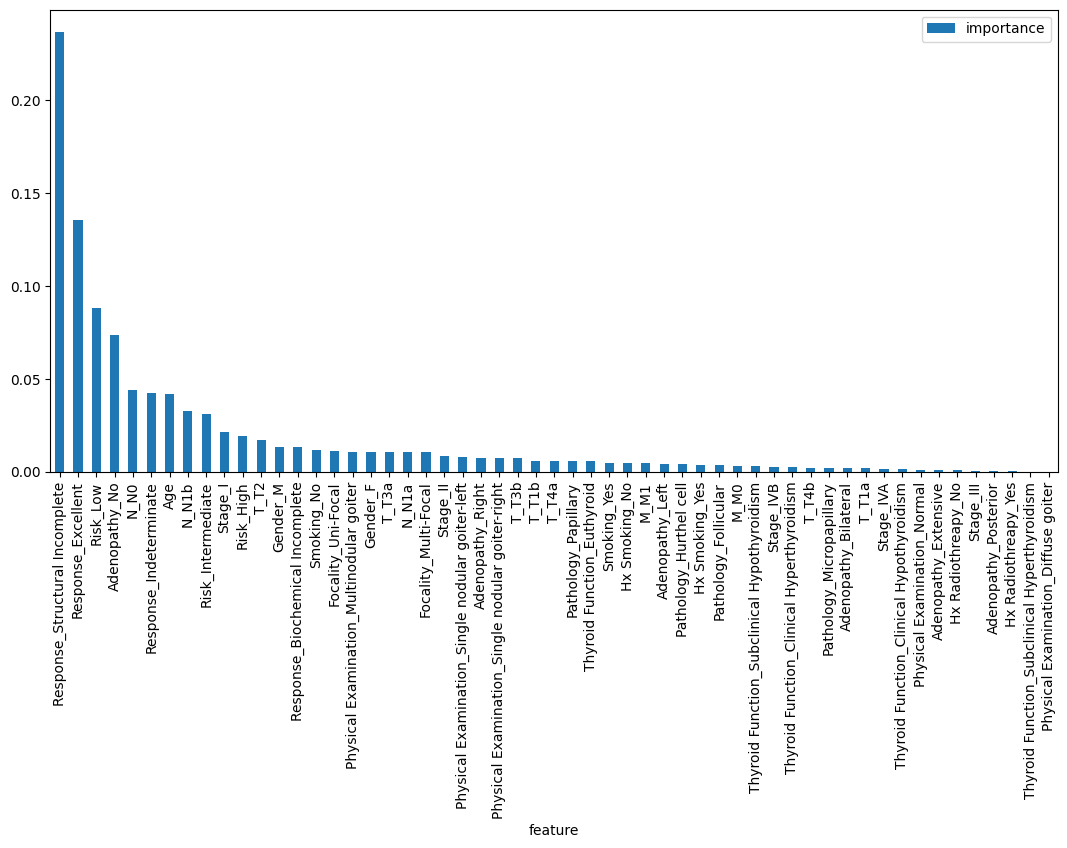

In [90]:
#Sort the dataframe
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

#Make a bar plot
feature_importance_df.plot.bar(x='feature', y='importance', figsize=(13, 6))

### Import the KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Set up hyperparameter grid

Try different options for: n_neighbors, weights, algorithm


In [ ]:
kneighbor_hyperparam_grid = {
    'n_neighbors': [4, 5, 6],
    'weights': ['uniform'],
    'algorithm': ['auto']
}

### Run grid search to get best parameters

In [ ]:
kn_classifier = KNeighborsClassifier()

kn_grid_search = GridSearchCV(estimator=kn_classifier, param_grid=hyperparam_grid, cv=2)

### Train model with best parameters

In [ ]:
grid_search.fit(X_train, y_train)

kn_best_hyperparams = kn_grid_search.best_params_

kn_best_hyperparams

### Evaluate the accuracy of the model

In [ ]:
kn_final_model = 

### Look a confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

con_matrix

array([[27,  2],
       [ 1, 70]])

### Calculate the different metrics

In [92]:
#Get individual values from confusion matrix

tp, fp, fn, tn = con_matrix.ravel() #Ravel comes from unravel

tp, fp , fn, tn

(np.int64(27), np.int64(2), np.int64(1), np.int64(70))

In [93]:
sensitivity = tp / (tp + fn)

sensitivity

np.float64(0.9642857142857143)

### We could calculate other metrics here

### Instead lets use classification report

In [94]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=['Yes','No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.96      0.93      0.95        29
          No       0.97      0.99      0.98        71

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



### Look at area under the curve

In [97]:
y_pred_probability

array([[9.99047619e-01, 9.52380952e-04]])

In [98]:
from sklearn.metrics import roc_auc_score

y_pred_probability = final_model.predict_proba(X_test)[:, 1] #[:1] says only show probability of yes

roc_auc = roc_auc_score(y_test, y_pred_probability)

roc_auc

0.9956289460903351

### Plot the ROC curve

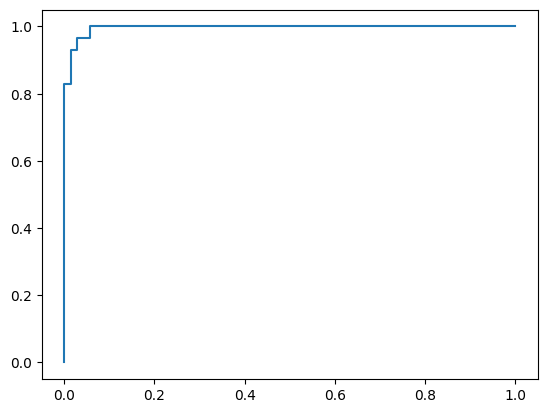

In [99]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability, pos_label='Yes')

plt.plot(fpr, tpr, marker=',') #Then google to make the graph look nice

### Lecture 11 activity

1. import the support vector classifier (SVC) #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
2. run a grid search to find best hyperparameters (C, kernel, and gamma)
3. train final model
4. make test set predictions
5. generate a clasasification report
6. get the ROC data
7. make an ROC plot for the SVC

In [100]:
from sklearn.svm import SVC

In [101]:
#Make parameter grid
svc_param_grid = {
    'C': [0.1, 1.0, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [107]:
svc = SVC()

svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid)

In [108]:
grid_search_svc.fit(X_test, y_test)

best_hyperparams_svc = grid_search_svc.best_params_

best_hyperparams_svc

NameError: name 'grid_search_svc' is not defined